<a href="https://colab.research.google.com/github/SarushanThiy/EV_DataAnalysis/blob/main/Data_Analysis_evdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis Techniques/Updated_dataset.csv')
df.head(n=10)

,id,Make,Car_Model,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,Genesis-GV60-Premium,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,Mercedes-EQB-350-4MATIC,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,Porsche-Taycan-Turbo,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,BMW-i4-eDrive40,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,Volkswagen-ID3-Pro-S---5-Seats,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,...,55,570,4261,1809,1568,2771,2300,447,385,5
5,1178,CUPRA,CUPRA-Born-110-kW---45-kWh,https://ev-database.org/car/1178/CUPRA-Born-11...,270,195,230,415,255,320,...,38,410,4322,1809,1540,2766,2240,607,385,5
6,1279,Skoda,Skoda-Enyaq-iV-60,https://ev-database.org/car/1279/Skoda-Enyaq-i...,320,235,275,480,300,375,...,53,440,4649,1879,1616,2764,2509,619,585,5
7,1438,Porsche,Porsche-Taycan-Turbo-Cross-Turismo,https://ev-database.org/car/1438/Porsche-Tayca...,395,290,340,565,370,455,...,45,980,4974,1967,1412,2904,2880,635,405,4
8,1281,Skoda,Skoda-Enyaq-iV-80x,https://ev-database.org/car/1281/Skoda-Enyaq-i...,395,290,340,580,370,460,...,49,500,4653,1879,1604,2768,2750,630,585,5
9,1625,Porsche,Porsche-Taycan-Turbo-Sport-Turismo,https://ev-database.org/car/1625/Porsche-Tayca...,395,295,345,565,375,460,...,45,1000,4963,1966,1391,2900,2880,550,405,4


In [ ]:
df1 = df.groupby('Make')['Charge Speed'].sum().to_frame().reset_index()
print(df1)

          Make  Charge Speed
0         Audi           687
1          BMW           386
2        CUPRA           205
3      Citroen           288
4           DS            36
5        Dacia            35
6         Fiat           333
7         Ford           229
8      Genesis           187
9        Honda            66
10      Hongqi            74
11     Hyundai           246
12         JAC            32
13      Jaguar            42
14         Kia           294
15       Lexus            29
16          MG           354
17       Mazda            53
18    Mercedes          1159
19        Mini            58
20      Nissan            32
21        Opel           174
22     Peugeot           327
23    Polestar           102
24     Porsche           866
25     Renault           550
26       Seres            29
27       Skoda           261
28       Smart           132
29      Subaru            28
30       Tesla           223
31      Toyota           203
32  Volkswagen           625
33       Volvo

We can see that Mercedes, Porche, Audi, Volkswagen and Peugeot are the most common brands. Investors should seek to buy from these brands as they are the most common, so it would be easier to purchase a large fleet from.

We can select to only use brands that have more than 5 available options of cars:
This is because they will have more experience within the industry, hence should produce better cars for all sorts of different environments and situations.

In [ ]:
make_counts = df['Make'].value_counts().head(11)
make_counts

Mercedes      24
Porsche       18
Audi          16
Volkswagen    13
Peugeot       12
Citroen       11
Toyota         8
BMW            8
MG             8
Fiat           8
Kia            6
Name: Make, dtype: int64

We can create a pie chart to show the number of cars within each manufacturer to see which manufacturer is more common

# Which manufacturers make the most electric cars?

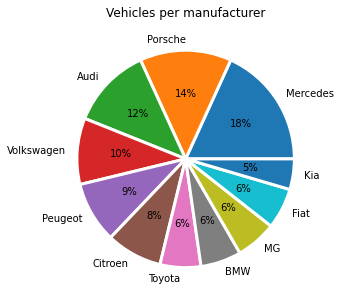

In [ ]:
counts = make_counts.plot(kind = 'pie', autopct='%1.0f%%', title = 'Vehicles per manufacturer', label = ' ', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, figsize = (5,5))

From the list of 34 different manufacturers, only 11 have over 6 different cars available. The biggest manufacturer is Mercedes with 24 vehicles, followed by Porche and Audi with 16 and 14 respectively. This would suggest that Greenwish Ltd board should select a car from one of these manufacturers

We can first analyse which make and model have the best charging speeds. This can be done by creating a new dataframe which only contains the make, model and charge speed values

In [ ]:
newdf = df[['Make', 'Car_Model', 'Charge Speed', 'Fastcharge Speed']].copy()
print(newdf)

           Make                            Car_Model  Charge Speed  \
0       Genesis                 Genesis-GV60-Premium            49   
1      Mercedes              Mercedes-EQB-350-4MATIC            46   
2       Porsche                 Porsche-Taycan-Turbo            46   
3           BMW                      BMW-i4-eDrive40            54   
4    Volkswagen       Volkswagen-ID3-Pro-S---5-Seats            55   
..          ...                                  ...           ...   
187     Porsche               Porsche-Taycan-Turbo-S            45   
188  Volkswagen       Volkswagen-ID3-Pro-S---4-Seats            55   
189     Citroen         Citroen-e-Berlingo-XL-50-kWh            27   
190        Audi  Audi-Q4-Sportback-e-tron-50-quattro            49   
191     Peugeot  Peugeot-e-Traveller-Standard-75-kWh            25   

     Fastcharge Speed  
0                1020  
1                 470  
2                1020  
3                 730  
4                 570  
..             

In [ ]:
newdf.sort_values(['Charge Speed', 'Fastcharge Speed'], ascending = [False, False])

,Make,Car_Model,Charge Speed,Fastcharge Speed
84,Renault,Renault-Megane-E-Tech-EV60-130hp,110,510
145,Renault,Renault-Megane-E-Tech-EV60-220hp,110,500
97,Renault,Renault-Megane-E-Tech-EV40-130hp,110,360
113,Renault,Renault-Zoe-ZE50-R110,110,230
157,Renault,Renault-Zoe-ZE50-R135,110,230
...,...,...,...,...
148,Citroen,Citroen-e-SpaceTourer-XL-75-kWh,24,280
150,Citroen,Citroen-e-Jumpy-Combi-XL-75-kWh,24,280
154,Peugeot,Peugeot-e-Traveller-Long-75-kWh,24,280
160,Fiat,Fiat-E-Ulysse-L3-75-kWh,24,280


In [ ]:
charge_speed_df = newdf[(newdf['Charge Speed'] > 50) & (newdf['Fastcharge Speed'] > 300)]

We can rank the values by the charging speed and only select the values where the charge speed is greater than 50. This way, we can ensure that one of the factors can be selected properly

In [ ]:
charge_speed_df.sort_values('Fastcharge Speed', ascending = False)

,Make,Car_Model,Charge Speed,Fastcharge Speed
185,Porsche,Porsche-Taycan-Plus,53,1170
155,Porsche,Porsche-Taycan-4S-Plus,51,1130
90,Kia,Kia-EV6-Long-Range-2WD,52,1070
89,Kia,Kia-EV6-Long-Range-AWD,51,1050
115,Porsche,Porsche-Taycan,54,1010
82,Porsche,Porsche-Taycan-4S,52,970
153,Mercedes,Mercedes-EQS-450plus,56,960
176,Mercedes,Mercedes-EQS-450-4MATIC,53,920
67,Mercedes,Mercedes-EQS-500-4MATIC,52,900
32,Mercedes,Mercedes-EQS-580-4MATIC,52,900


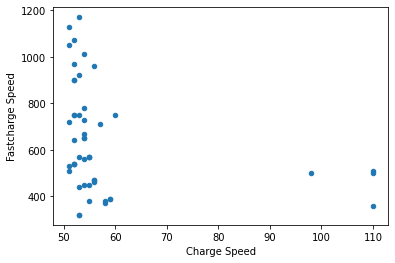

In [ ]:
charge_speed_df.plot(x="Charge Speed", y="Fastcharge Speed", kind="scatter")

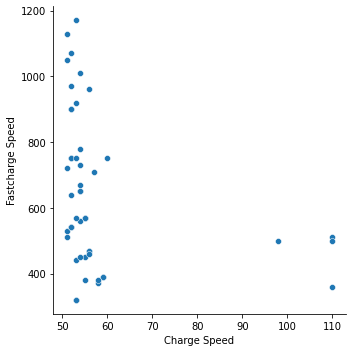

In [ ]:
sns.relplot(data=charge_speed_df, x="Charge Speed", y="Fastcharge Speed")

In [ ]:
fast_charge_total = charge_speed_df.groupby('Car_Model')['Fastcharge Speed'].sum().sort_values(ascending=False).head(10)
fast_charge_total

Car_Model
Porsche-Taycan-Plus        1170
Porsche-Taycan-4S-Plus     1130
Kia-EV6-Long-Range-2WD     1070
Kia-EV6-Long-Range-AWD     1050
Porsche-Taycan             1010
Porsche-Taycan-4S           970
Mercedes-EQS-450plus        960
Mercedes-EQS-450-4MATIC     920
Mercedes-EQS-500-4MATIC     900
Mercedes-EQS-580-4MATIC     900
Name: Fastcharge Speed, dtype: int64

In [ ]:
Model = ['Porsche-Taycan-Plus ','Porsche-Taycan-4S-Plus', 'Kia-EV6-Long-Range-2WD', 'Kia-EV6-Long-Range-AWD', 'Porsche-Taycan', 'Porsche-Taycan-4S', 'Mercedes-EQS-450plus', 'Mercedes-EQS-450-4MATIC', 'Mercedes-EQS-500-4MATIC', 'Mercedes-EQS-580-4MATIC' ]
Fastcharge_total = [1170, 1130, 1070, 1050, 1010, 970, 960, 920, 900, 900]

# Which car is most effective at fast charging?

One of the key factors in deciding which electric car to use is how fast it can charge. Looking at the speeds, we can see that the following 10 vehicles all have speeds above 900km, with the top 4 vehicles having over 1000km.

[Text(0, 0.5, 'Model'), Text(0.5, 0, 'Fast Charge Speed')]

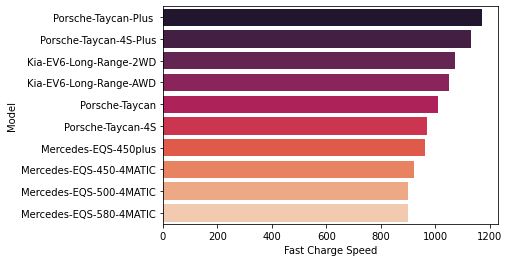

In [ ]:
ax = sns.barplot(x=Fastcharge_total,y=Model, color='b', palette ='rocket', saturation = 0.85, linewidth=4)
ax.set(xlabel='Fast Charge Speed', ylabel='Model')

# Now lets look at other factors that can have an impact on which model to buy
The first one can be 

In [ ]:
capacity_total = df.groupby('Car_Model')['Battery Capacity'].sum().sort_values(ascending=False).head(10)
capacity_total.tolist()

[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 111.5, 111.5, 105.0]

In [ ]:
Model = ['Mercedes-EQS-500-4MATIC  ','Mercedes-EQS-450plus ', 'Mercedes-EQS-SUV-450plus', 'Mercedes-EQS-SUV-450-4MATIC', 'Mercedes-EQS-AMG-53-4MATICplus', 'Mercedes-EQS-580-4MATIC ', 'Mercedes-EQS-450-4MATIC', 'BMW-iX-xDrive50', 'BMW-iX-M60', 'BMW-i7-xDrive60' ]
Battery_total = [120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 111.5, 111.5, 105.0]

[Text(0, 0.5, 'Model'), Text(0.5, 0, 'Battery_total')]

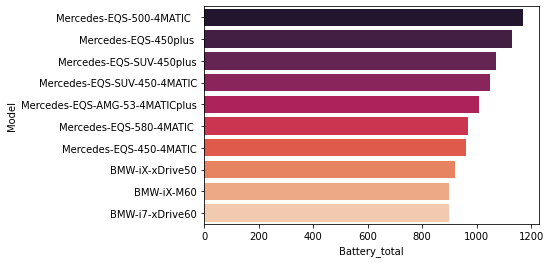

In [ ]:
bax = sns.barplot(x=Fastcharge_total,y=Model, color='b', palette ='rocket', saturation = 0.85, linewidth=4)
bax.set(xlabel='Battery_total', ylabel='Model')

Comparing the common values from both this graph and the graph for fast charging, the best option for both charging speed and capacity are:
Mercedes-EQS-500-4MATIC, Mercedes-EQS-SUV-450-4MATIC, Mercedes-EQS-SUV-580-4MATIC and Mercedes-EQS-450plus.

# Finally we can look at how the vehicles perform at different climates to ascertain which car is most effective in both mild and cold weather

For this dataframe, we need the column for the car models and both columns for combined weather types

In [ ]:
weather_df = df[['Car_Model', 'Combined - Cold Weather', 'Combined - Mild Weather']]
weather_df

,Car_Model,Combined - Cold Weather,Combined - Mild Weather
0,Genesis-GV60-Premium,330,445
1,Mercedes-EQB-350-4MATIC,280,375
2,Porsche-Taycan-Turbo,350,470
3,BMW-i4-eDrive40,390,540
4,Volkswagen-ID3-Pro-S---5-Seats,380,520
...,...,...,...
187,Porsche-Taycan-Turbo-S,340,450
188,Volkswagen-ID3-Pro-S---4-Seats,380,515
189,Citroen-e-Berlingo-XL-50-kWh,170,220
190,Audi-Q4-Sportback-e-tron-50-quattro,340,460


In [ ]:
top10 = weather_df.sort_values('Combined - Cold Weather', ascending = False).head(10)
top10

,Car_Model,Combined - Cold Weather,Combined - Mild Weather
153,Mercedes-EQS-450plus,535,740
176,Mercedes-EQS-450-4MATIC,515,705
67,Mercedes-EQS-500-4MATIC,510,700
32,Mercedes-EQS-580-4MATIC,510,700
49,Mercedes-EQS-AMG-53-4MATICplus,475,645
106,Mercedes-EQE-350plus,440,605
143,Mercedes-EQE-350,430,590
98,Mercedes-EQE-300,430,590
104,BMW-iX-xDrive50,430,575
163,BMW-i7-xDrive60,430,580


In [ ]:
pivoted = top10.pivot('Car_Model', 'Combined - Cold Weather', 'Combined - Mild Weather')
pivoted

Combined - Cold Weather,430,440,475,510,515,535
Car_Model,,,,,,
BMW-i7-xDrive60,580.0,NaN,NaN,NaN,NaN,NaN
BMW-iX-xDrive50,575.0,NaN,NaN,NaN,NaN,NaN
Mercedes-EQE-300,590.0,NaN,NaN,NaN,NaN,NaN
Mercedes-EQE-350,590.0,NaN,NaN,NaN,NaN,NaN
Mercedes-EQE-350plus,NaN,605.0,NaN,NaN,NaN,NaN
Mercedes-EQS-450-4MATIC,NaN,NaN,NaN,NaN,705.0,NaN
Mercedes-EQS-450plus,NaN,NaN,NaN,NaN,NaN,740.0
Mercedes-EQS-500-4MATIC,NaN,NaN,NaN,700.0,NaN,NaN
Mercedes-EQS-580-4MATIC,NaN,NaN,NaN,700.0,NaN,NaN
